In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# file directory check
import os
for dirname,_,filenames in os.walk('/content/drive/MyDrive/Principles of Data Science/Data/Summer_winter'):
  for filename in filenames:
    os.path.join(dirname,filename)


In [ ]:
# import basic libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2


In [ ]:
DATADIR = '/content/drive/MyDrive/Principles of Data Science/Data/Summer_winter'
CATEGORIES = ['Summer', 'Winter']
#height and width 
IMG_SIZE = 100


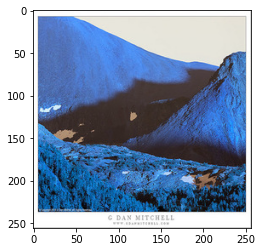

In [ ]:
# to plot a sample image
for category in CATEGORIES:
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    plt.imshow(img_array)
    plt.show()
    break
  break


In [ ]:
# perform some processing to store the data
training_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,img))
        new_array = cv2.resize (img_array, (IMG_SIZE,IMG_SIZE))
        training_data.append([new_array,class_num])


In [ ]:
create_training_data()

In [ ]:
# separating the dataset into image and labels
X = []
y = []

for categories, label in training_data:
  X.append(categories)
  y.append(label)



In [ ]:
lenofimage = len(training_data)


In [ ]:
X= np.array(X).reshape(lenofimage,-1)
X.shape


(547, 30000)

In [ ]:
# flatten the array
X = X/255.0


In [ ]:
#split the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,
KNeighborsClassifier)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### **Support Vector Machine classification algorithm**

In [ ]:
clf = svm.SVC(kernel='precomputed')

# linear kernel computation
gram_train = np.dot(X_train, X_train.T)
clf.fit(gram_train, y_train)

# predict on training examples
gram_test = np.dot(X_test, X_train.T)
y2 = clf.predict(gram_test)

print("Accuracy score is", accuracy_score(y_test,y2))
print("Classification report is", classification_report(y_test,y2))

Accuracy score is 0.7727272727272727
Classification report is               precision    recall  f1-score   support

           0       0.80      0.81      0.81        64
           1       0.73      0.72      0.73        46

    accuracy                           0.77       110
   macro avg       0.77      0.76      0.77       110
weighted avg       0.77      0.77      0.77       110



### **Gaussian Classification algorithm**

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy score is", accuracy_score(y_test,y_pred))
print("Classification report is", classification_report(y_test,y_pred))

Number of mislabeled points out of a total 110 points : 32
Accuracy score is 0.7090909090909091
Classification report is               precision    recall  f1-score   support

           0       0.73      0.80      0.76        64
           1       0.68      0.59      0.63        46

    accuracy                           0.71       110
   macro avg       0.70      0.69      0.69       110
weighted avg       0.71      0.71      0.71       110



### **Stochastic Gradient Descent classification**

In [ ]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X, y)
SGDClassifier(max_iter=5)
SGD_y = clf.predict(X_test)
print("Accuracy score is", accuracy_score(y_test,SGD_y))
print("Classification report is", classification_report(y_test,SGD_y))

Accuracy score is 0.6909090909090909
Classification report is               precision    recall  f1-score   support

           0       1.00      0.47      0.64        64
           1       0.57      1.00      0.73        46

    accuracy                           0.69       110
   macro avg       0.79      0.73      0.68       110
weighted avg       0.82      0.69      0.68       110



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
